In [1]:
%matplotlib inline 
%reload_ext autoreload
%autoreload 2

In [2]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.family'] = 'Arial'

In [3]:
import os

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

from scipy.stats import spearmanr

In [4]:
from access_biology_data import meta, relations, annotation, properties
from access_literature_data import medline
from access_science_shared import standardizer

import sys
sys.path.append('./../src/')
from aging_tools import inout, export, calculators
from access_aging_data import chaperome, earlier_studies, sequencing


In [5]:
import matplotlib
matplotlib.rcParams.update({'font.size': 10})

In [6]:
save_images = True

In [7]:
taxon_id = 9606

In [8]:
ref_genes = standardizer.reference_genes(taxon_id, 'orp')

In [9]:

pr = properties.genbank_validated_rna(taxon_id)[
    ['gene_ncbi', 'Genbank_validated_RNA: full_SumACGT']].rename(columns={
    'Genbank_validated_RNA: full_SumACGT': 'length'
})
pr.loc[:, 'log_length'] = np.log10(pr['length'])
pr = pr[pr['gene_ncbi'].isin(ref_genes)]
pr.loc[:, 'rank'] = pr['length'].rank(pct=True)

In [10]:
p = inout.get_internal_path(
    'datasets/general/resources/publications/gallego_romero_2014/12915_2014_776_MOESM11_ESM.txt'
)

In [11]:
df = pd.read_csv(p, sep=' ')

In [12]:
df = df.rename(columns={'Ensembl_ID': 'gene_ensembl'})

In [13]:
from access_science_shared import mapper

In [14]:
df = mapper.gene_ensembl_2_gene_ncbi_unambiguously(df, taxon_id).reset_index()

In [15]:
df = pd.merge(df, pr)

In [16]:
df = df[df['gene_ncbi'].isin(ref_genes)]

In [17]:
m = df['Decay_constant'].abs().max() + 0.001

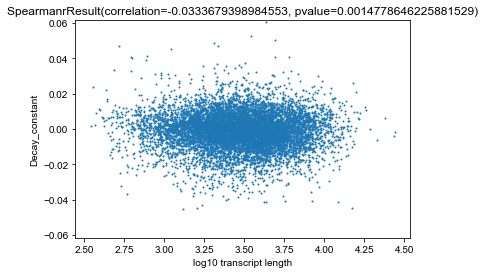

In [18]:
plt.title(spearmanr(df['log_length'], df['Decay_constant']))
plt.scatter(df['log_length'], df['Decay_constant'], s=1)
plt.ylim([-m, m])

plt.xlabel('log10 transcript length')
plt.ylabel('Decay_constant')

if save_images:
    export.export_image('191031_length_vs_degradation/scatter.pdf')